In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
import warnings
warnings.filterwarnings('ignore')

sns.set()
%matplotlib inline

In [67]:
data = pd.read_csv("diabetes (2).csv")

In [68]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [69]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [56]:
data.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
      

In [57]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [58]:
data.duplicated().sum()

0

In [11]:
data['BMI'].value_counts()

32.0    13
31.2    12
31.6    12
0.0     11
33.3    10
        ..
19.3     1
49.3     1
19.4     1
20.0     1
40.1     1
Name: BMI, Length: 248, dtype: int64

## Dealing with 0 values

In [70]:
# replacing zero values with the mean of the columnn

data['BMI'] = data['BMI'].replace(0, data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0, data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0, data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0, data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].mean())

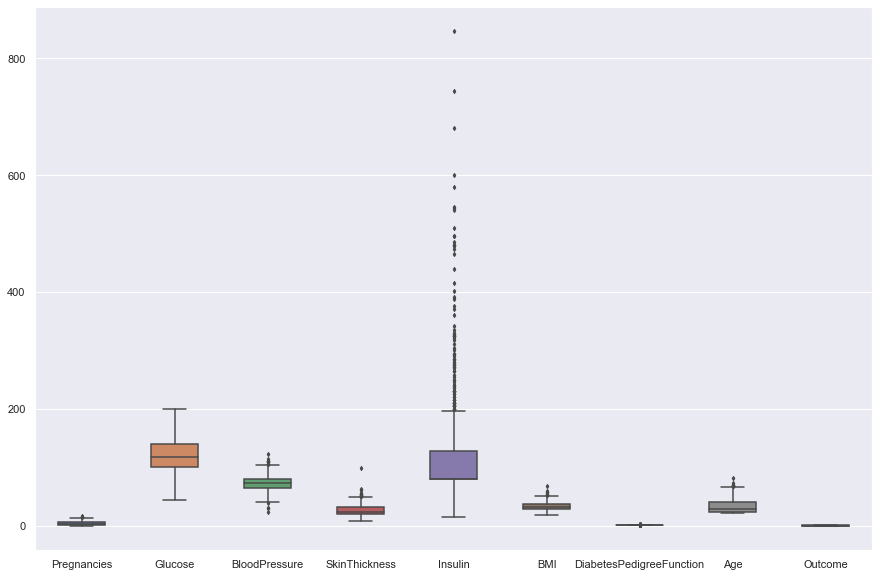

In [71]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.boxplot(data = data, width = 0.5, ax = ax, fliersize = 3)# fliersize changes the size of outliers..
plt.show()

# Dealing with Outliers..

<AxesSubplot:>

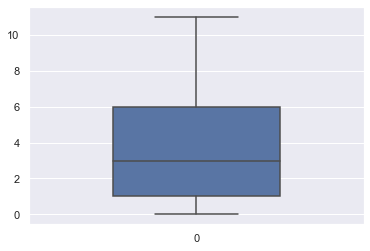

In [72]:
outlier = data['Pregnancies'].quantile(0.98)
# removing the top 2% data from the pregnancies column
data = data[data['Pregnancies']<outlier]
sns.boxplot(data = data['Pregnancies'], width = 0.5)

In [15]:
outlier = data['BMI'].quantile(0.99)
# removing the top 1% data from BMI column
data = data[data['BMI']<outlier]


In [16]:
outlier = data['SkinThickness'].quantile(0.99)
# removing the top 1% data from SkinThickness column
data = data[data['SkinThickness']<outlier]


In [17]:


outlier = data['DiabetesPedigreeFunction'].quantile(0.99)
# removing the top 1% data from DiabetesPedigreeFunction column
data = data[data['DiabetesPedigreeFunction']<outlier]

outlier = data['Age'].quantile(0.99)
# removing the top 1% data from Age column
data = data[data['Age']<outlier]

<AxesSubplot:>

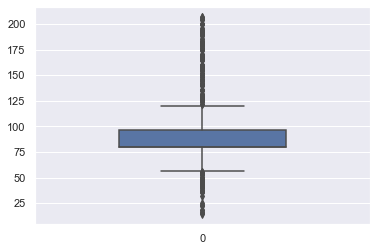

In [74]:
outlier = data['Insulin'].quantile(0.95)
# removing the top 5% data from Insulin column
data = data[data['Insulin']<outlier]
sns.boxplot(data = data['Insulin'], width = 0.5)

<AxesSubplot:>

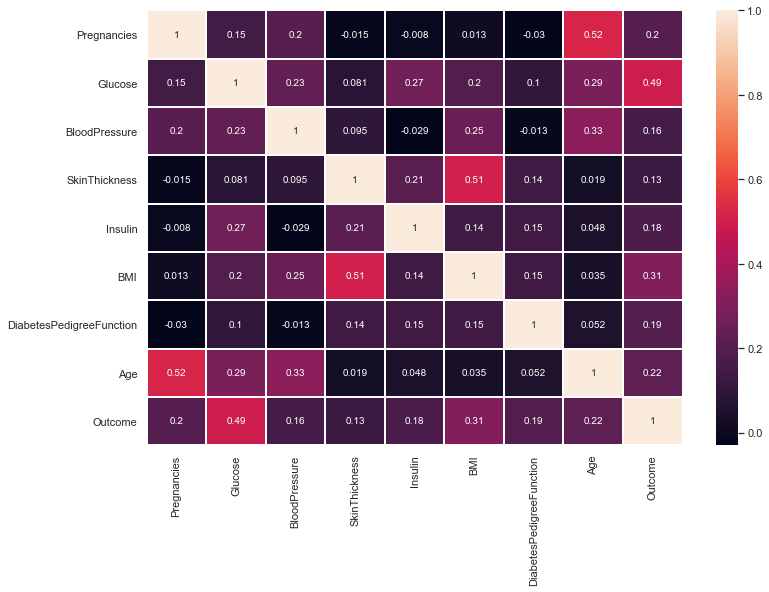

In [77]:
plt.figure(figsize = (12, 8))
sns.heatmap(data.corr(), annot = True, linewidths = 1)

In [78]:
X = data.drop(columns = ['Outcome'])
y = data['Outcome']

In [79]:
# splitting the data into testing and training data.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [80]:
# scaling the data 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Ada Boost Classifier

In [27]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

ada = AdaBoostClassifier(base_estimator = dtc)

parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(ada, parameters, n_jobs = -1, cv = 5, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [28]:
# best parameter and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 120}
0.710891089108911


In [ ]:
ada = AdaBoostClassifier(base_estimator = dtc,algorithm= 'SAMME', learning_rate= 0.1, n_estimators= 120)
ada.fit(X_train,Y_train)
ada.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ada = AdaBoostClassifier(base_estimator = dtc, algorithm = 'SAMME', learning_rate = 0.001, n_estimators = 120)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

ada_train_acc = accuracy_score(y_train, ada.predict(X_train))
ada_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Ada Boost Model is {ada_train_acc}")
print(f"Test Accuracy of Ada Boost Model is {ada_test_acc}")

Training Accuracy of Ada Boost Model is 1.0
Test Accuracy of Ada Boost Model is 0.6923076923076923


In [33]:
# confusion matrix

confusion_matrix(y_test, y_pred)

array([[88, 29],
       [23, 29]], dtype=int64)

In [34]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       117
           1       0.50      0.56      0.53        52

    accuracy                           0.69       169
   macro avg       0.65      0.65      0.65       169
weighted avg       0.70      0.69      0.70       169



# Gradient Boosting Classifier

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search = GridSearchCV(gb, parameters, cv = 5, n_jobs = -1, verbose = 1)# change the values of verbose >1,>2,>3
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [36]:
# best parameter and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'learning_rate': 0.1, 'loss': 'deviance', 'n_estimators': 150}
0.7722772277227723


In [37]:
gb = GradientBoostingClassifier(learning_rate = 0.1, loss = 'deviance', n_estimators = 150)
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

gb_train_acc = accuracy_score(y_train, gb.predict(X_train))
gb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Gradient Boosting Classifier Model is {gb_train_acc}")
print(f"Test Accuracy of Gradient Boosting Classifier Model is {gb_test_acc}")

Training Accuracy of Gradient Boosting Classifier Model is 0.9801980198019802
Test Accuracy of Gradient Boosting Classifier Model is 0.7810650887573964


In [38]:
# confusion matrix

confusion_matrix(y_test, y_pred)

array([[103,  14],
       [ 23,  29]], dtype=int64)

In [39]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       117
           1       0.67      0.56      0.61        52

    accuracy                           0.78       169
   macro avg       0.75      0.72      0.73       169
weighted avg       0.77      0.78      0.77       169



### Stochastic Gradient Boosting (SGB)

In [40]:
sgbc = GradientBoostingClassifier(learning_rate = 0.1, subsample = 0.9, max_features = 0.75, loss = 'deviance',
                                  n_estimators = 100)

sgbc.fit(X_train, y_train)

y_pred = sgbc.predict(X_test)

sgbc_train_acc = accuracy_score(y_train, sgbc.predict(X_train))
sgbc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of SGB Model is {sgbc_train_acc}")
print(f"Test Accuracy of SGB Model is {sgbc_test_acc}")

Training Accuracy of SGB Model is 0.9445544554455445
Test Accuracy of SGB Model is 0.7455621301775148


In [41]:
# confusion matrix

confusion_matrix(y_test, y_pred)

array([[101,  16],
       [ 27,  25]], dtype=int64)

In [42]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       117
           1       0.61      0.48      0.54        52

    accuracy                           0.75       169
   macro avg       0.70      0.67      0.68       169
weighted avg       0.73      0.75      0.74       169

